# Exercise07

## Temperature Time Series

I would like you to download the LAN-WX.csv file into your working directory for this notebook and use it for today's exercise.  Provided the page is up (it wasn't earlier), you can find documentation about each of the columns in the CSV file here: 
https://www1.ncdc.noaa.gov/pub/data/cdo/documentation/GHCND_documentation.pdf

For the purposes of our exercise, we are most interested in these columns:
* DATE
* TMIN the minimum daily temperature
* TMAX the maximum daily temperature

I would like you to do the following:
* As with today's lecture, convert the DATE column into a temporal-based index for the data frame.
* Using this and the methods from today, I'd like you to do the following:
    1. Display a table that shows the maximum daily temperatures for each month in the year 2013.
    2. Find the maximum temperature in Lansing for the day of your birth and each birthday thereafter and plot it as a violin plot using Seaborn.
    3. Find the decade maximum high and low temperature from 1950.  Plot both the maximum and minimum values as a single line plot.
    4. This class started on Jaunary 11, 2020 and runs for 16 weeks. It meets on Mondays and Wednesdays. Use boxplots to plot the historical distribution from 1960 onward of high temperatures for each date we meet this semester.  In other words, plot the range of maximum temperatures for each (month,day) value in the 2020 course calendar across all years from 1960 onward.
    5. The number of 90&deg;F days per year are often used to describe climate change.  Plot the average number of 90&deg;F days as a rolling average over 5 years across the entire data set. 
    
**Create markdown cells to annotate your work using the directions above to create cells with level-2 headings** and the descriptions above in them.  (You do remember your Markdown?)

Note:  You will likely have to use Google and the Pandas documnetation quite a bit to answer the questions above.  This is normal!  

In [1]:
import pandas as pd
import datetime
import dateutil
import seaborn as sns
import matplotlib.pyplot as plt

Reading the weather data

In [2]:
data = pd.read_csv("LAN-WX.csv")
data.head()

,STATION,NAME,DATE,PRCP,PSUN,SNOW,SNWD,TAVG,TMAX,TMIN,...,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,WV03
0,USW00014836,"LANSING CAPITAL CITY AIRPORT, MI US",1950-01-01,0.01,NaN,0.0,0.0,NaN,45.0,38.0,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00014836,"LANSING CAPITAL CITY AIRPORT, MI US",1950-01-02,0.14,NaN,0.0,0.0,NaN,49.0,44.0,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00014836,"LANSING CAPITAL CITY AIRPORT, MI US",1950-01-03,0.63,NaN,0.0,0.0,NaN,58.0,49.0,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,USW00014836,"LANSING CAPITAL CITY AIRPORT, MI US",1950-01-04,0.17,NaN,0.0,0.0,NaN,53.0,19.0,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN
4,USW00014836,"LANSING CAPITAL CITY AIRPORT, MI US",1950-01-05,0.00,NaN,0.0,0.0,NaN,25.0,20.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


Convert the DATE column into a temporal-based index for the data frame.

In [3]:
data['date'] = pd.to_datetime(data['DATE'],format="%Y-%m-%d")
data = data.set_index(['date'])
data = data.drop(["DATE"],axis=1)
data.head()

,STATION,NAME,PRCP,PSUN,SNOW,SNWD,TAVG,TMAX,TMIN,TSUN,...,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,WV03
date,,,,,,,,,,,,,,,,,,,,,
1950-01-01,USW00014836,"LANSING CAPITAL CITY AIRPORT, MI US",0.01,NaN,0.0,0.0,NaN,45.0,38.0,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1950-01-02,USW00014836,"LANSING CAPITAL CITY AIRPORT, MI US",0.14,NaN,0.0,0.0,NaN,49.0,44.0,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1950-01-03,USW00014836,"LANSING CAPITAL CITY AIRPORT, MI US",0.63,NaN,0.0,0.0,NaN,58.0,49.0,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1950-01-04,USW00014836,"LANSING CAPITAL CITY AIRPORT, MI US",0.17,NaN,0.0,0.0,NaN,53.0,19.0,NaN,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN
1950-01-05,USW00014836,"LANSING CAPITAL CITY AIRPORT, MI US",0.00,NaN,0.0,0.0,NaN,25.0,20.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


## Question 1

Display a table that shows the maximum daily temperatures for each month in the year 2013.

In [4]:
data[data.index.year == 2013]["TMAX"].resample('M').agg('max')

date
2013-01-31    58.0
2013-02-28    46.0
2013-03-31    56.0
2013-04-30    74.0
2013-05-31    88.0
2013-06-30    88.0
2013-07-31    94.0
2013-08-31    89.0
2013-09-30    92.0
2013-10-31    80.0
2013-11-30    63.0
2013-12-31    59.0
Freq: M, Name: TMAX, dtype: float64

## Question 2

Find the maximum temperature in Lansing for the day of your birth and each birthday thereafter and plot it as a violin plot using Seaborn.

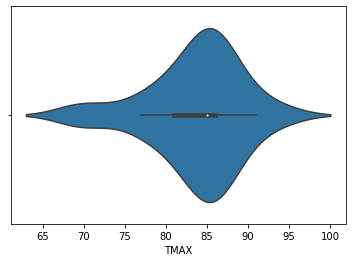

In [5]:
sns.violinplot(x=data[(data.index.month == 7) & (data.index.day == 18) & (data.index.year >= 1996)]["TMAX"])
plt.show()

## Question 3

Find the decade maximum high and low temperature from 1950.  Plot both the maximum and minimum values as a single line plot.

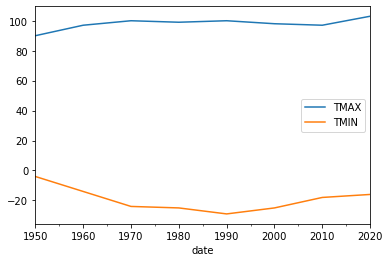

In [6]:
pd.concat([data["TMAX"].resample('10Y').agg('max'),data["TMIN"].resample('10Y').agg('min')],axis=1).plot()
plt.show()

## Question 4

This class started on Jaunary 11, 2020 and runs for 16 weeks. It meets on Mondays and Wednesdays. Use boxplots to plot the historical distribution from 1960 onward of high temperatures for each date we meet this semester.  In other words, plot the range of maximum temperatures for each (month,day) value in the 2020 course calendar across all years from 1960 onward.

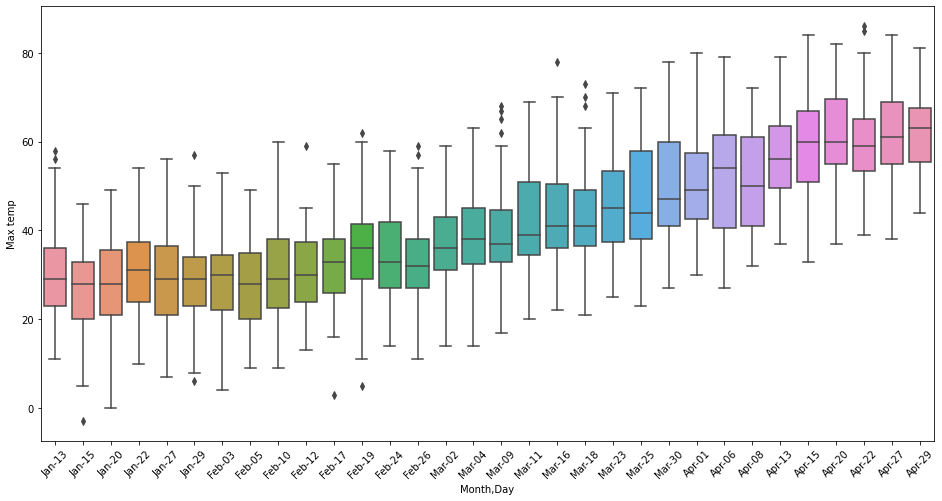

In [7]:
#Get all the class dates in 2020
class_days=[str(i.date()) for i in pd.bdate_range(start="2020-01-11",periods=32,freq="C",weekmask="Mon Wed")]
#Loop through all the class days and save the last 60 years yearly frequent dates
hist_days = [pd.date_range(end=j,periods=datetime.datetime.strptime(j,"%Y-%m-%d").year - 1960,freq=pd.DateOffset(years=1)) for j in class_days]
#Converting the above list into a list with the class dates in the last 60 years
hist_days_final = [str(i.date()) for a in hist_days for i in a]
#Filtering out the dates from the original dataset
data_q4 = data[data.index.isin(hist_days_final)]["TMAX"].copy()
#Create a (month,day) column to create a subplot
data_q4 = pd.concat([data_q4,pd.Series(data_q4.index.strftime('%b-%d'),index=data_q4.index)],axis=1)
#Change the column names
data_q4.columns = ["Max temp","Month,Day"]
#Increasing the figure size
plt.subplots(figsize=(16,8))
#Boxplot 
sns.boxplot(y="Max temp",x="Month,Day",data=data_q4)
#Rotating the x ticks
plt.xticks(rotation=45)
plt.show()

## Question 5

The number of 90&deg;F days per year are often used to describe climate change.  Plot the average number of 90&deg;F days as a rolling average over 5 years across the entire data set. 

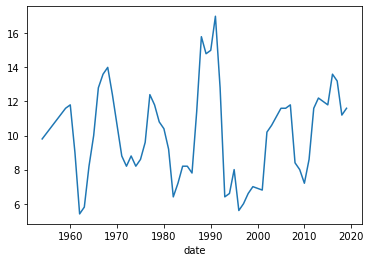

In [8]:
data[data.TMAX >= 90].groupby(data[data.TMAX >= 90].index.year)["NAME"].count().rolling(5).mean().plot()
plt.show()